### Bibliotecas

In [1]:
import pygmt as gmt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creacion del mapa base

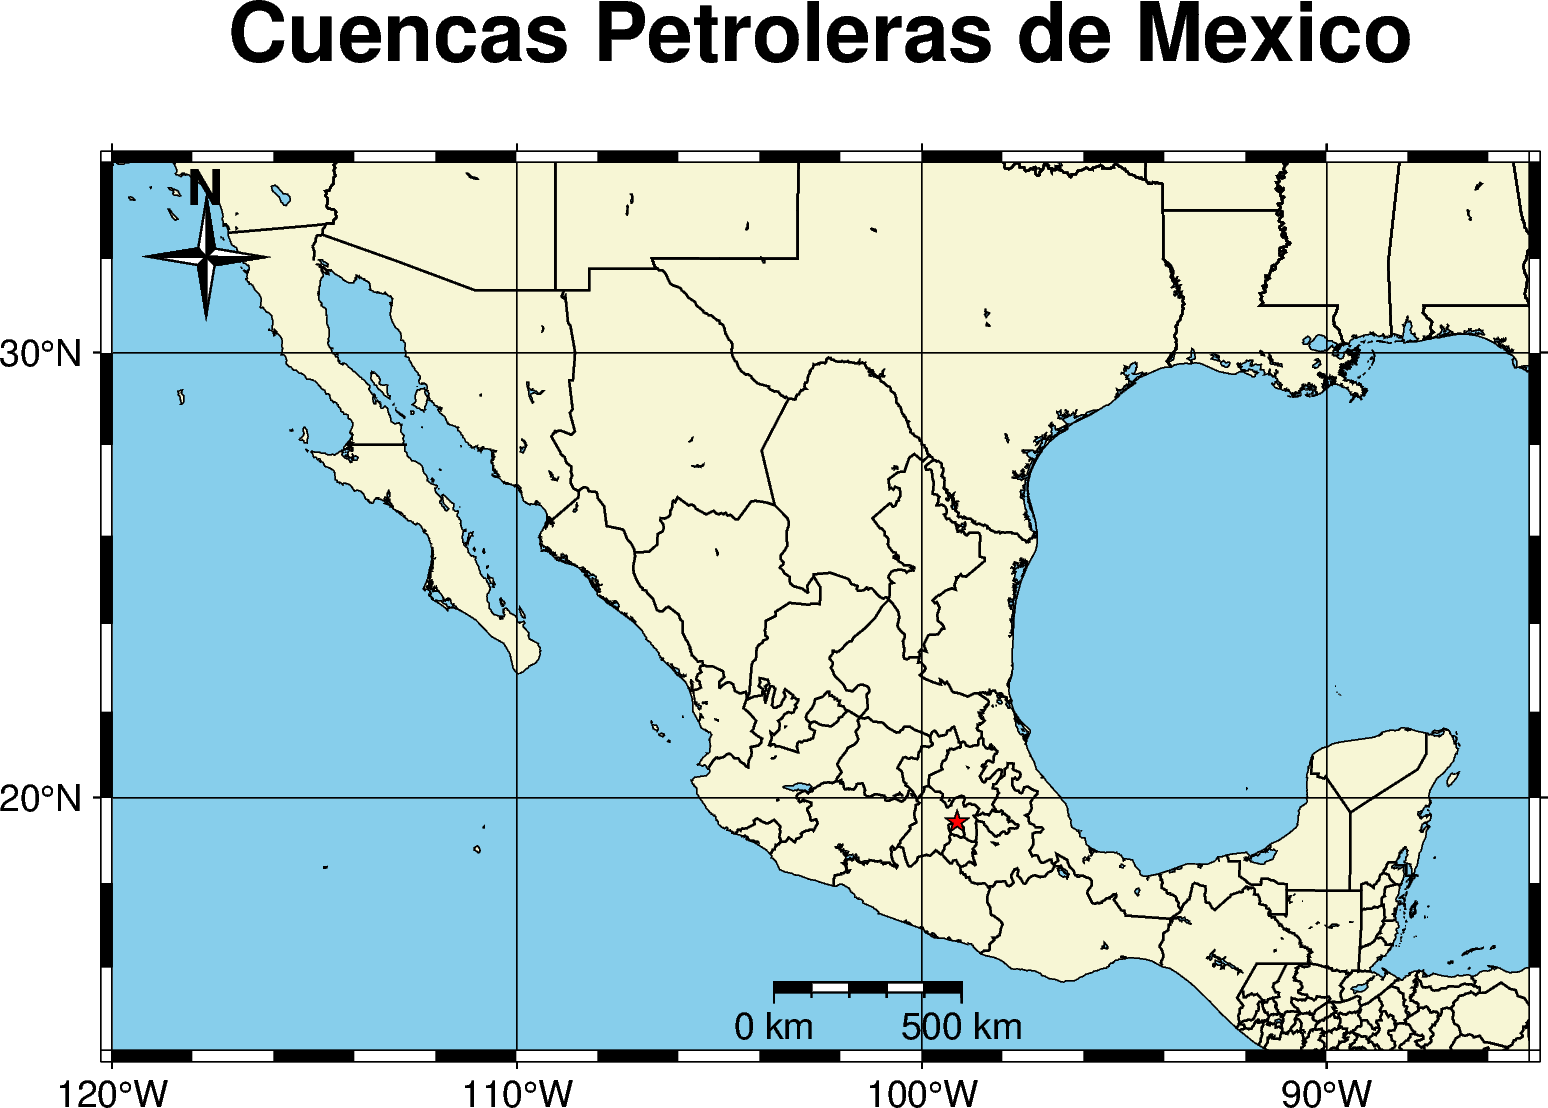

In [2]:
fig=gmt.Figure()
fig.coast(
    region=[-120,-85,14,34], #long min, long max, lat min, lat max
    projection='M12c', #Mercator 12 centimentros
    frame=['afg', '+t"Cuencas Petroleras de Mexico"'], #ag para las cotas y el grid, titulo
    land='#F7F6D5', #color de la corteza terrestre
    water='skyblue', #color del agua
    shorelines=True, #linea de costa
    map_scale="jMB+f+w500k+u+o0.4c", #escla f+w1000k
    Td='jTL+o0.3c+w1c+f1', #rosa de los vientos
    borders=["1/0.5p,black", "2/0.5p,black"] #limites fornterizos
)

# se grafica una estrella para señalar la capital
fig.plot(x=-99.12766, y=19.42847, style="a0.2c", color="red", pen="black", label='CDMX')

# Norte de la rosa de los vientos
fig.text(text="N", x=-117.7, y=33.5, font="12p,Helvetica-Bold,black")

fig.show()

### Lectura del archivo shp de https://mapa.hidrocarburos.gob.mx/

In [2]:
# se lee el archivo .shp con los poligonos
provincias = gpd.read_file("provincias\Provincias Petroleras con Recursos Prospectivos.shp")

In [3]:
# visualizacion del dataframe
provincias.head(2) #son 13 cuencas en total

,nombre,situacin,ubicacin,rea_km2,recursos_p,recursos_1,recursos_2,recursos_3,recursos_4,recursos_5,versin,geometry
0,SABINAS - BURRO - PICACHOS,PRODUCTORAS,TERRESTRE,118334.66,0.4,14.0,0.0,0.6,2.0,67.0,2021,"POLYGON ((-100.16567 28.17032, -100.16601 28.1..."
1,GOLFO DE MEXICO PROFUNDO,PRODUCTORAS,GOLFO PROFUNDO,497161.98,23.9,0.0,13.8,0.0,50.5,0.0,2021,"POLYGON ((-96.24378 26.00883, -95.96794 26.008..."


### Se grafican las provincias

<AxesSubplot:>

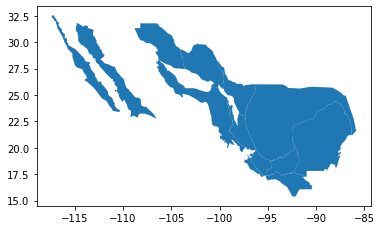

In [5]:
# en la columna geometry estan los poligonos a graficar
provincias.loc[:, 'geometry'].plot()

### Determinar las cuencas con recursos

In [6]:
# se seleccionan las provincias con recursos
provincias.loc[provincias['recursos_p']>0]

,nombre,situacin,ubicacin,rea_km2,recursos_p,recursos_1,recursos_2,recursos_3,recursos_4,recursos_5,versin,geometry
0,SABINAS - BURRO - PICACHOS,PRODUCTORAS,TERRESTRE,118334.66,0.4,14.0,0.0,0.6,2.0,67.0,2021,"POLYGON ((-100.16567 28.17032, -100.16601 28.1..."
1,GOLFO DE MEXICO PROFUNDO,PRODUCTORAS,GOLFO PROFUNDO,497161.98,23.9,0.0,13.8,0.0,50.5,0.0,2021,"POLYGON ((-96.24378 26.00883, -95.96794 26.008..."
2,TAMPICO-MISANTLA,PRODUCTORAS,TERRESTRE-PLATAFORMA,56936.90,2.3,38.9,1.4,34.8,4.7,20.7,2021,"POLYGON ((-97.98216 23.25808, -97.90430 23.258..."
3,PLATAFORMA DE YUCATAN,POTENCIAL MEDIO-BAJO,TERRESTRE-PLATAFORMA,322284.22,1.8,0.0,1.8,0.0,0.1,0.0,2021,"POLYGON ((-86.33420 21.20550, -86.40832 21.231..."
4,SURESTE,PRODUCTORAS,TERRESTRE-PLATAFORMA,58469.17,14.5,0.0,13.0,0.0,7.2,0.0,2021,"POLYGON ((-92.33998 17.62623, -92.39649 17.651..."
5,VERACRUZ,PRODUCTORAS,TERRESTRE-PLATAFORMA,32778.20,1.4,0.6,0.3,0.6,5.6,0.0,2021,"POLYGON ((-94.77896 18.80843, -94.77724 18.804..."
6,CINTURON PLEGADO DE CHIAPAS,POTENCIAL MEDIO-BAJO,TERRESTRE,59886.54,1.2,0.0,1.2,0.0,0.0,0.0,2021,"POLYGON ((-95.13435 17.38352, -95.09272 17.368..."
7,BURGOS,PRODUCTORAS,TERRESTRE-PLATAFORMA,73803.41,3.2,10.8,0.6,0.0,13.2,53.8,2021,"POLYGON ((-100.15826 28.16751, -100.15511 28.1..."


### Se crean las cuencas en archivos individuales

In [7]:
# Localizar las provincias por su nombre
provincias.loc[provincias['nombre']=='SABINAS - BURRO - PICACHOS']

,nombre,situacin,ubicacin,rea_km2,recursos_p,recursos_1,recursos_2,recursos_3,recursos_4,recursos_5,versin,geometry
0,SABINAS - BURRO - PICACHOS,PRODUCTORAS,TERRESTRE,118334.66,0.4,14.0,0.0,0.6,2.0,67.0,2021,"POLYGON ((-100.16567 28.17032, -100.16601 28.1..."


In [8]:
# Cuenca de Sabinas
cuenca1=provincias.loc[provincias['nombre']=='SABINAS - BURRO - PICACHOS']

<AxesSubplot:>

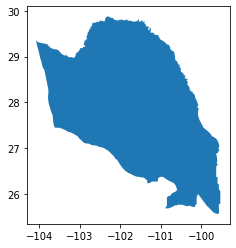

In [9]:
# se grafica el poligono de la cuenca de Sabinas
cuenca1.loc[:, 'geometry'].plot()

### Se crean los archivos .gmt

El proceso que aqui se lleva a cabo es la exportacion de los poligonos del archivo shp invidivualmente para crear archivos que PyGMT pueda graficar, se basa en esta [pregunta](https://forum.generic-mapping-tools.org/t/how-to-color-polygons-of-a-geopandas-dataframe-in-pygmt/1138/2)

In [10]:
# Se obtiene la lista de los nombres de las provincias de interes
nombres=provincias['nombre'].loc[provincias['recursos_p']>0]
for i in range(8):
    filename='cuenca'+str(i+1)+'.gmt' #nombre del archivo cuenca1.gmt, cuenca2.gmt...
    cuenca=provincias.loc[provincias['nombre']==nombres[i]] #seleccion de la cuenca por nombre
    cuenca.to_file(filename, driver='OGR_GMT') # se crea el archivo .gmt

In [11]:
# se cambian los nombres, mayuscula la primer letra de cada palabra
nombres1=[i.title() for i in nombres]

### Se grafican las cuencas en el mapa

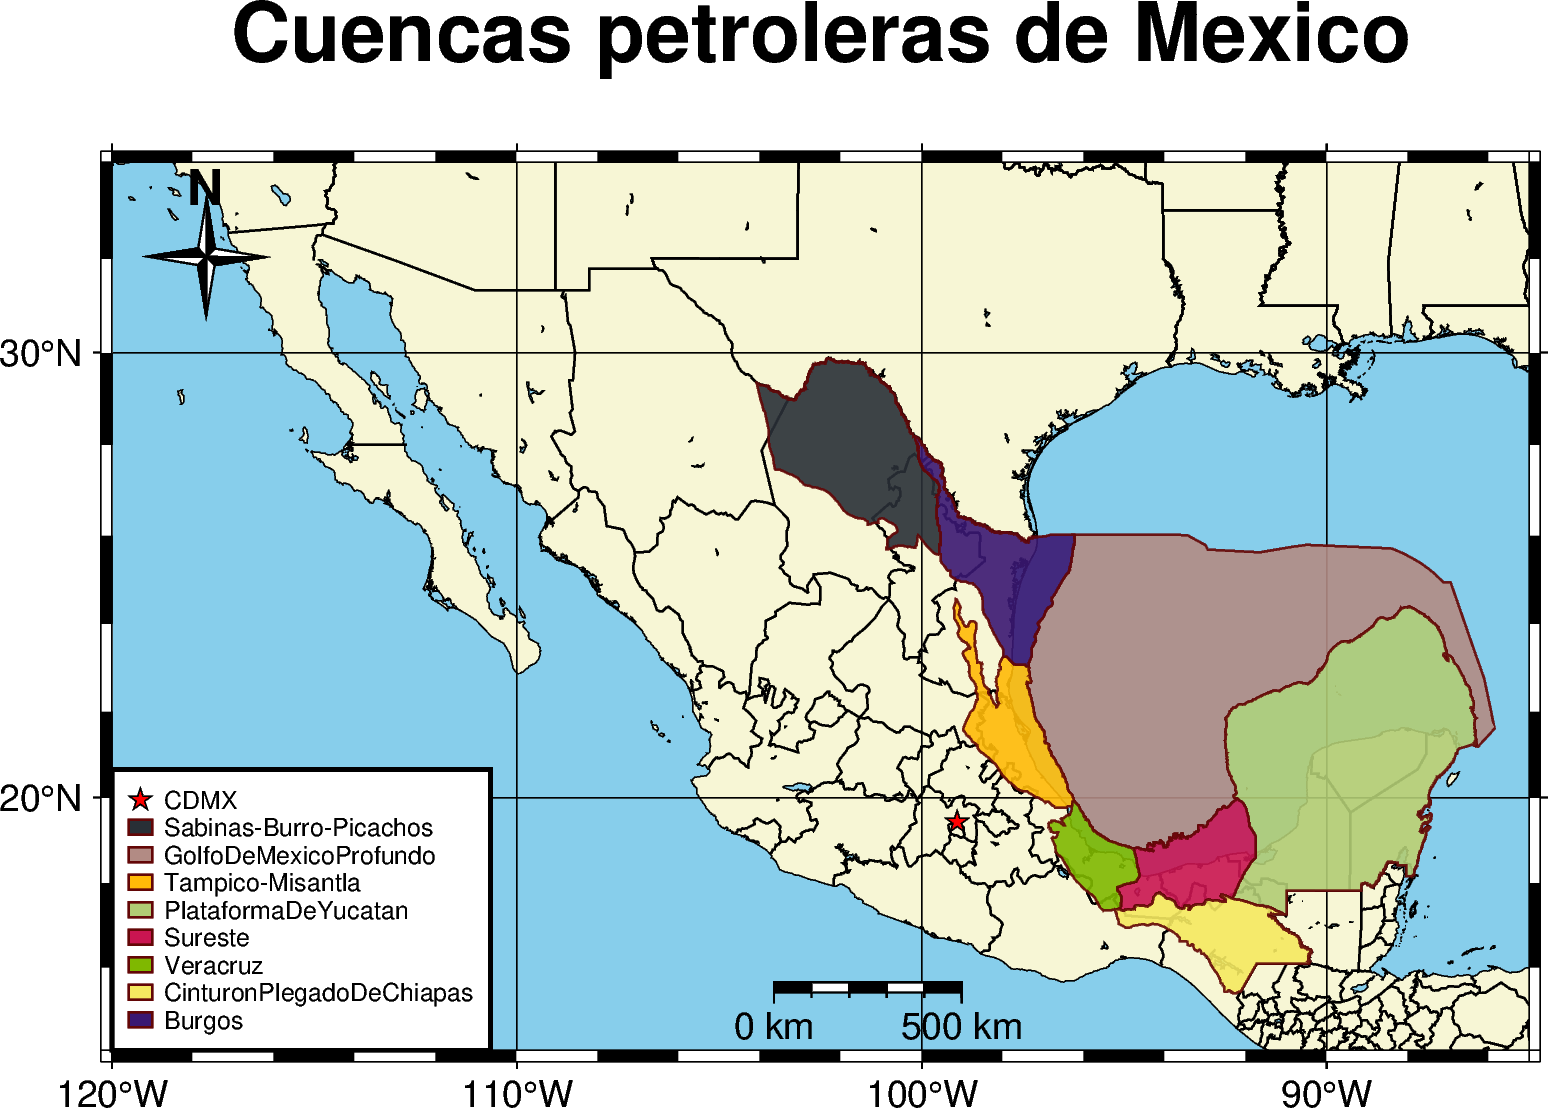

In [16]:
fig=gmt.Figure()
fig.coast(
    region=[-120,-85,14,34], #long min, long max, lat min, lat max
    projection='M12c', #Mercator 12 centimentros
    frame=['afg', '+t"Cuencas petroleras de Mexico"'], #ag para las cotas y el grid, titulo
    land='#F7F6D5', #color de la corteza terrestre
    water='skyblue', #color del agua
    shorelines=True, #linea de costa
    map_scale="jMB+f+w500k+u+o0.4c", #escla f+w1000k
    Td='jTL+o0.3c+w1c+f1', #rosa de los vientos
    borders=["1/0.5p,black", "2/0.5p,black"] #limites fornterizos , "2/0.5p,black"
)
#cdmx
fig.plot(x=-99.12766, y=19.42847, style="a0.2c", color="red", pen="black", label='CDMX')
#Norte
fig.text(text="N", x=-117.7, y=33.5, font="12p,Helvetica-Bold,black")

# lista de colores, aleatorios, de los poligonos a graficar
colors=['#D06224','#E9C891','#EADEB8','#FFCC29','#558776','#A3A847','#DEEDF0','#F6E6E4']
colors2=['#292F36','#B28B84','#FFBA08','#B1CC74','#CA1551','#7FB800','#F5E960','#3A1772']
for i in range(8):
    provincia='cuenca'+str(i+1)+'.gmt'
    fig.plot(
        data=provincia,  #archivo GMT
        pen="0.5p,#630606",  #contorno
        color=colors2[i],  #color de relleno
        close=True,  #forzar cerrar el poligono
        label=nombres1[i].replace(" ", ""), #nombre de la cuenca
        transparency=10 #transparencia
    )
with gmt.config(FONT_ANNOT_PRIMARY="6p"): #Para cambiar el tamano de la fuente
    fig.legend(position='JBL+jBL',box='+gwhite+p1p') # Simbologia
fig.show()

### Paginas de ayuda
- https://github.com/GenericMappingTools/pygmt/issues/477
- https://forum.generic-mapping-tools.org/t/how-to-color-polygons-of-a-geopandas-dataframe-in-pygmt/1138/2
- https://docs.generic-mapping-tools.org/dev/cookbook/features.html#auto-scaling
- 
- 